<a href="https://colab.research.google.com/github/hizirong/Dealing-With-Imbalanced-data/blob/main/Data-level-method_credit_card_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SRC:
https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_illustration_generation_sample.html

TOMELINK: https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

SMOTE: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

GITHUB: https://github.com/Swastik-25/Imbalanced-Data-with-SMOTE-Techniques/blob/main/Imbalanced_Data.ipynb



# Compare sampler combining over- and under-sampling

This example shows the effect of applying an under-sampling algorithms after
SMOTE over-sampling. In the literature, Tomek's link and edited nearest
neighbours are the two methods which have been used and are available in
imbalanced-learn.


In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

Automatically created module for IPython interactive environment


## Dataset preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root = 'drive/My Drive/Colab Notebooks/datasets/'

Mounted at /content/drive


In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
import pandas as pd

credit_card = pd.read_csv(root + "creditcard.csv")

num_classes = credit_card.shape[0]
print("Number of credit card data : ", num_classes)
credit_card.head()

Number of credit card data :  284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X= credit_card[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time','Amount']]
y = credit_card['Class']

Original dataset shape Counter({0: 284315, 1: 492})


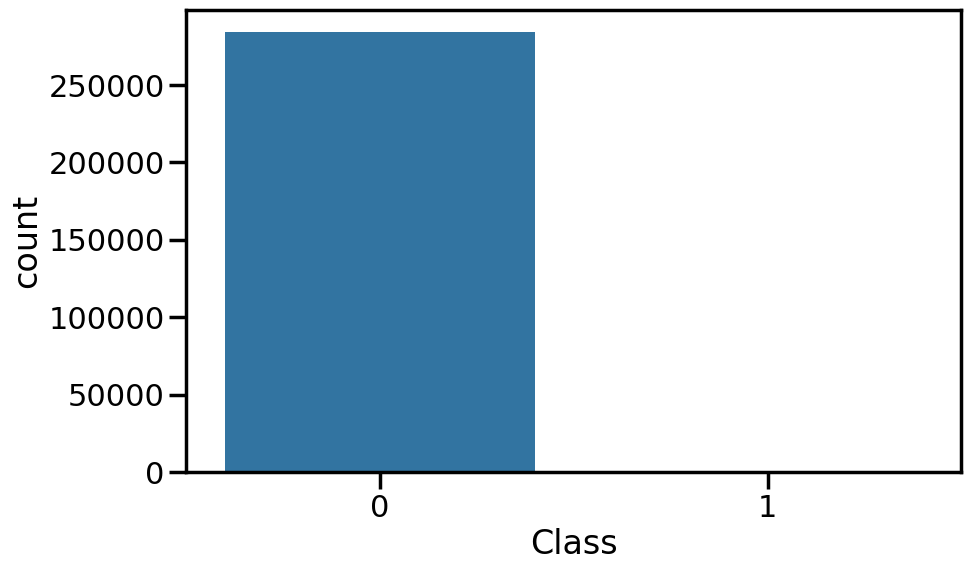

In [ ]:
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from collections import Counter

# 將資料集拆分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 看原始資料分類情形
credit_card_class = credit_card.groupby("Class")
credit_card_class.head()

%matplotlib inline
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x=credit_card.Class)

print('Original dataset shape %s' % Counter(y))

## 抽樣方法


In [ ]:
from collections import Counter

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smo = SMOTE(k_neighbors=4,random_state=42)
X_smo, y_smo = smo.fit_resample(X_train, y_train)

In [ ]:
# TomekLinks
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [ ]:
# SMOTETomek
from imblearn.combine import SMOTETomek
# 創建 SMOTE 和 TomekLinks 對象，並分别設置鄰居數量參數
smote = SMOTE(k_neighbors=4, random_state=42)
tomek = TomekLinks()
smotl = SMOTETomek(smote=smote, tomek=TomekLinks())
X_smotl, y_smotl = smotl.fit_resample(X_train, y_train)


In [ ]:
# SMOTEENN: 比 SMOTETomek 清除更多噪音 -  https://imbalanced-learn.org/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py
from imblearn.combine import SMOTEENN
smote = SMOTE(k_neighbors=4, random_state=42)
sme = SMOTEENN(smote=smote)
X_sme, y_sme = sme.fit_resample(X_train, y_train)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
print('SMOTE Resampled dataset shape %s' % Counter(y_smo))
print('TomekLinks Resampled dataset shape %s' % Counter(y_tl))
print('SMOTETomek Resampled dataset shape %s' % Counter(y_smotl))
print('SMOTEENN Resampled dataset shape %s' % Counter(y_sme))

Original dataset shape Counter({0: 227451, 1: 394})
SMOTE Resampled dataset shape Counter({0: 227451, 1: 227451})
TomekLinks Resampled dataset shape Counter({0: 227387, 1: 394})
SMOTETomek Resampled dataset shape Counter({0: 227451, 1: 227032})
SMOTEENN Resampled dataset shape Counter({1: 221668, 0: 213835})


## Classification using a KNN model


In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef

clf = KNeighborsClassifier(n_neighbors=3)

#對四組資料做模型
data = [[X_train, y_train],
      [X_smo, y_smo],
       [X_tl, y_tl],
      [X_smotl, y_smotl],
      [X_sme, y_sme]]

name = [' ', 'SMOTE + ','Tomelinks + ','SMOTETomek + ','SMOTEENN + ']

### KNN 調整參數(Better)
- n_neighbors: 要取幾個鄰居(儘量設置奇數)
- p: 選擇距離的計算方式
- weights: 投票方式為距離等權重或加權
- algorithm:演算法的選擇 (計算效率的考慮)

 
Precision score  1.00 - Balanced accuracy: 0.54 - Geometric mean: 0.29 - Recall: 0.08 - Accuracy: 1.00 - ROCAUC: 0.54 - F1-SCORE: 0.15 - Matthews Correlation Coefficient: 0.2854884503706513
--------------------------------------------------------------------------------
SMOTE + 
Precision score  0.51 - Balanced accuracy: 0.73 - Geometric mean: 0.69 - Recall: 0.50 - Accuracy: 0.96 - ROCAUC: 0.73 - F1-SCORE: 0.04 - Matthews Correlation Coefficient: 0.09950173125538245
--------------------------------------------------------------------------------
Tomelinks + 
Precision score  1.00 - Balanced accuracy: 0.54 - Geometric mean: 0.29 - Recall: 0.08 - Accuracy: 1.00 - ROCAUC: 0.54 - F1-SCORE: 0.15 - Matthews Correlation Coefficient: 0.2854884503706513
--------------------------------------------------------------------------------
SMOTETomek + 
Precision score  0.51 - Balanced accuracy: 0.73 - Geometric mean: 0.69 - Recall: 0.50 - Accuracy: 0.96 - ROCAUC: 0.73 - F1-SCORE: 0.04 - Matthews Co

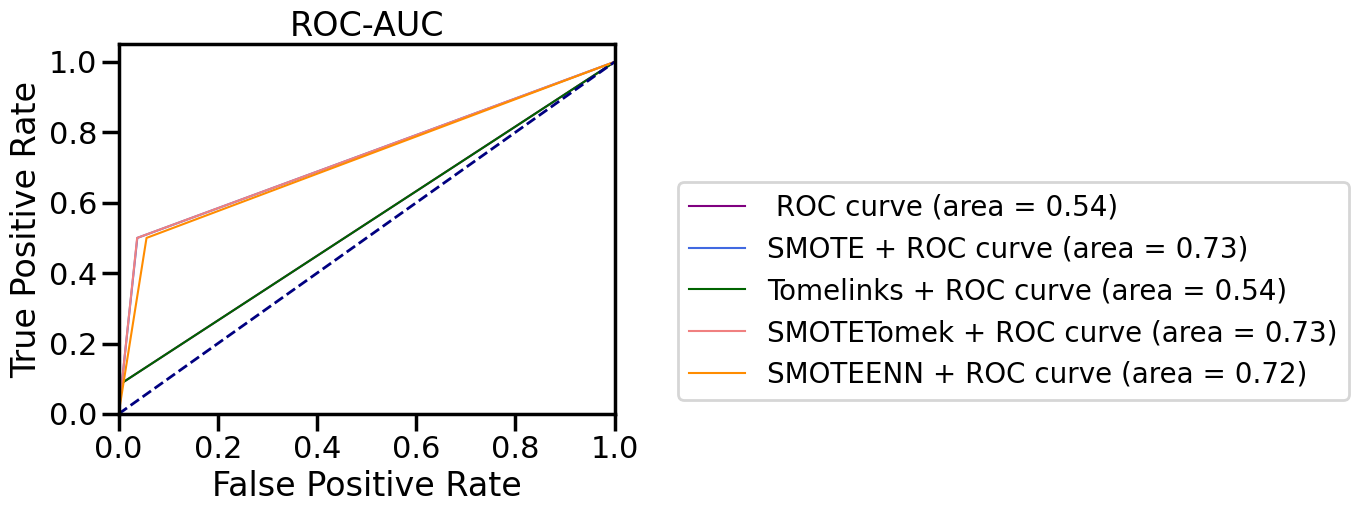

In [ ]:
from sklearn.metrics import roc_curve, auc

index = 0
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute')

# 準備 ROC 曲線畫布
plt.figure()
color_data = ['purple','royalblue','darkgreen','lightcoral','darkorange']

for features, labels in data:
  clf = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute')
  clf.fit(features, labels)
  y_pred_tree = clf.predict(X_test)

  print(name[index])
  print(
    f"Precision score  {precision_score(y_test, y_pred_tree, average='macro'):.2f} - "
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_tree):.2f} - "
    f"Geometric mean: {geometric_mean_score(y_test, y_pred_tree):.2f} - "
    f"Recall: {recall_score(y_test, y_pred_tree):.2f} - "
    f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f} - "
    f"ROCAUC: {roc_auc_score(y_test, y_pred_tree):.2f} - "
    f"F1-SCORE: {f1_score(y_test, y_pred_tree):.2f} - "
    f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred_tree)}"
  )
  print('-'*80)

  # 計算ROC曲線參數
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

  # 計算AUC
  roc_auc = auc(fpr, tpr)
  #繪製ROC曲線
  plt.plot(fpr, tpr, color=color_data[index], lw=1.5, label=name[index]+'ROC curve (area = %0.2f)' % roc_auc)
  index+=1


plt.legend(loc='lower left', fontsize='small', bbox_to_anchor=(1.10,0.0)) # 設置圖例
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')

plt.show()




### KNN 未調整參數

In [1]:
index = 0

# 準備 ROC 曲線畫布
plt.figure()
color_data = ['gold','royalblue','darkgreen','lightcoral','darkorange']

for features, labels in data:
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(features, labels)
  y_pred_tree = clf.predict(X_test)

  print(name[index])
  print(
    f"Precision score  {precision_score(y_test, y_pred_tree, average='macro'):.2f} - "
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_tree):.2f} - "
    f"Geometric mean: {geometric_mean_score(y_test, y_pred_tree):.2f} - "
    f"Recall: {recall_score(y_test, y_pred_tree):.2f} - "
    f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f} - "
    f"ROCAUC: {roc_auc_score(y_test, y_pred_tree):.2f} - "
    f"F1-SCORE: {f1_score(y_test, y_pred_tree):.2f} - "
    f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred_tree)}"
  )
  print('-'*80)


  from sklearn.metrics import roc_curve, auc


  # 計算ROC曲線參數
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

  # 計算AUC
  roc_auc = auc(fpr, tpr)

  #繪製ROC曲線
  plt.plot(fpr, tpr, color=color_data[index], lw=2, label=name[index]+' ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  index+=1

plt.show()




NameError: name 'plt' is not defined

##Classification using a Random Forest Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score

tree = RandomForestClassifier(random_state=42)

#對四組資料做模型
data = [[X_train, y_train],
      [X_smo, y_smo],
      [X_tl, y_tl],
      [X_smotl, y_smotl],
      [X_sme, y_sme]]

name = [' ', 'SMOTE + ','Tomelinks + ','SMOTETomek + ','SMOTEENN + ']

 
Precision score  0.99 - Balanced accuracy: 0.89 - Geometric mean: 0.89 - Recall: 0.79 - Accuracy: 1.00 - ROCAUC: 0.89 - F1-SCORE: 0.87 - Matthews Correlation Coefficient: 0.8749276812909632
--------------------------------------------------------------------------------
SMOTE + 
Precision score  0.94 - Balanced accuracy: 0.92 - Geometric mean: 0.92 - Recall: 0.85 - Accuracy: 1.00 - ROCAUC: 0.92 - F1-SCORE: 0.86 - Matthews Correlation Coefficient: 0.8645430972026528
--------------------------------------------------------------------------------
Tomelinks + 
Precision score  0.99 - Balanced accuracy: 0.89 - Geometric mean: 0.88 - Recall: 0.78 - Accuracy: 1.00 - ROCAUC: 0.89 - F1-SCORE: 0.86 - Matthews Correlation Coefficient: 0.8690748763736589
--------------------------------------------------------------------------------
SMOTETomek + 
Precision score  0.94 - Balanced accuracy: 0.92 - Geometric mean: 0.92 - Recall: 0.85 - Accuracy: 1.00 - ROCAUC: 0.92 - F1-SCORE: 0.86 - Matthews Cor

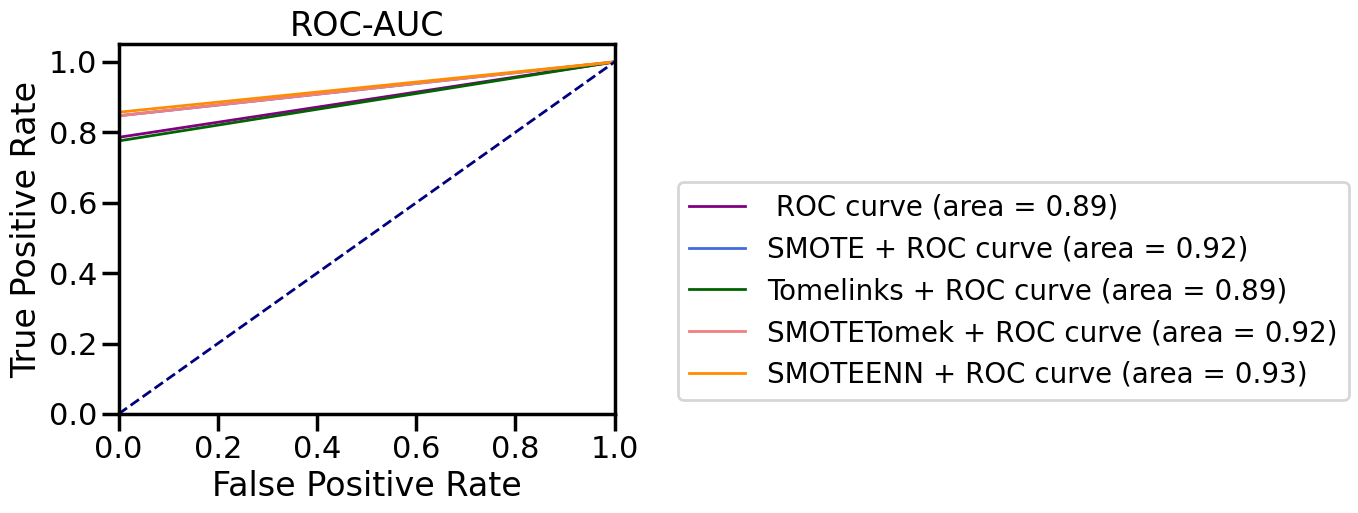

In [ ]:
index = 0

# 準備 ROC 曲線畫布
plt.figure()
color_data2 = ['purple','royalblue','darkgreen','lightcoral','darkorange']

for features, labels in data:
  tree = RandomForestClassifier(random_state=42)
  tree.fit(features, labels)
  y_pred_tree = tree.predict(X_test)

  print(name[index])
  print(
    f"Precision score  {precision_score(y_test, y_pred_tree, average='macro'):.2f} - "
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_tree):.2f} - "
    f"Geometric mean: {geometric_mean_score(y_test, y_pred_tree):.2f} - "
    f"Recall: {recall_score(y_test, y_pred_tree):.2f} - "
    f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f} - "
    f"ROCAUC: {roc_auc_score(y_test, y_pred_tree):.2f} - "
    f"F1-SCORE: {f1_score(y_test, y_pred_tree):.2f} - "
    f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred_tree)}"
  )
  print('-'*80)

  # 計算ROC曲線參數
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

  # 計算AUC
  roc_auc = auc(fpr, tpr)
  #繪製ROC曲線
  plt.plot(fpr, tpr, color=color_data2[index], lw=2, label=name[index]+'ROC curve (area = %0.2f)' % roc_auc)
  index+=1


plt.legend(loc='lower left', fontsize='small', bbox_to_anchor=(1.10,0.0)) # 設置圖例
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')

plt.show()

